# Linear classification

In classification task we have categorical targets $y \in \mathcal Y = \{1 ,\ldots, K\}$.

## Why not linear regression?

However, the class labels in this settings are numbers, and we could fit a linear regression. Why is this not a good idea?

```{admonition} Answer
:class: dropdown
The possible problems are:
* Inappropriate predictions: $\widehat y$ could easily be outside $\mathcal Y$
* No inherent ordering between class labels
* Loss function mismatch: MSE could be quite poor metric of quality
```

## Binary case

Suppose that $\mathcal Y = \{-1, 1\}$, then we could predict labels of $\boldsymbol x \in \mathbb R^d$ by the formula

$$
    \widehat y = \mathrm{sgn}\Big(\sum\limits_{j=1}^d x_j w_j\Big) = \mathrm{sgn}(\boldsymbol x^\top \boldsymbol w).
$$

What about loss function? Rewrite the misclassification rate {eq}`mis-rate` as

```{math}
:label: mis-rate-class
\mathcal L(\boldsymbol w) = \frac 1n\sum\limits_{i=1}^n [\boldsymbol x_i^\top \boldsymbol w y_i < 0].
```

### Margins

Define the **margin** of the training sample $(\boldsymbol x_i, y_i)$ as

$$
    M_i = \boldsymbol x_i^\top \boldsymbol w y_i.
$$

If the margin is positive, the prediction is correct, and vise versa. Now we can express the loss function {eq}`mis-rate-class` in terms of margins:

```{math}
:label: mis-rate-margin
\mathcal L(\boldsymbol w) = \frac 1n\sum\limits_{i=1}^n \ell(M_i), \quad \ell(M) = [M < 0].
```

The function $\ell$ is discontinuous, which impedes the direct optimization of this loss functions. That's why $\ell$ is often substituted by some smooth loss function $\overline{\ell}(M)$, which estimates $\ell(M)$ from above: $\ell(M) \leqslant \overline{\ell}(M)$.

Popular choices of $\overline{\ell}(M)$:

- $V(M) = (1 - M)_+$ (SVM)
- $H(M) = (-M)_+$ (Hebb's rule)
- $L(M) = \log_2(1 + e^{-M})$ (LR)
- $Q(M) = (1 - M)^2$ (quadratic)
- $S(M) = \frac 2{1 + e^{-M}}$ (sigmoid)
- $E(M) = e^{-M}$ (exponential)


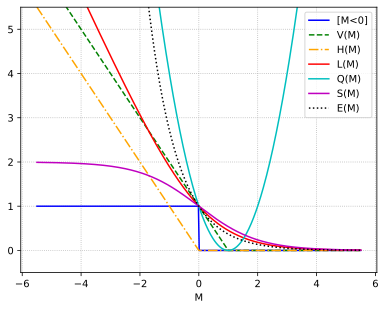

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_formats = ['svg']

fig, ax = plt.subplots()


ax.set_xlabel('M')
x = np.linspace(-5.5, 5.5, num=400)
acc_loss = x < 0
V_M = (1 - x) * ((1 - x) > 0)
H_M = acc_loss * (-x)
L_M = np.log2(1 + np.exp(-x))
Q_M = (1 - x)**2
S_M = 2 * (1 + np.exp(x))**(-1)
E_M = np.exp(-x)

ax.plot(x, acc_loss, 'b', label='[M<0]')
ax.plot(x, V_M, '--g', label='V(M)')
ax.plot(x, H_M, 'orange', ls="-.", label='H(M)')
ax.plot(x, L_M, 'r', label='L(M)')
ax.plot(x, Q_M, 'c', label='Q(M)')
ax.plot(x, S_M, 'm', label='S(M)')
ax.plot(x, E_M, 'k:', label='E(M)')

ax.set_ylim(-0.5, 5.5)
ax.grid(ls=":")
plt.legend(loc='best')
plt.show()

### Predicting probabilities

Another common way to classify objects with labels from $\mathcal Y = 
\{0, 1\}$ is to predict probability of positive class:

$$
    \widehat y = \mathbb P(\boldsymbol x \in \text{class } 1).
$$

Linear regression $\widehat y = \boldsymbol x^\top \boldsymbol w$ is not suitable for this purpose since $\widehat y$ here can be any real number. However, it is not difficult to convert it to the desired probability. Just apply the sigmoid function

$$
\sigma(t) = \frac 1{1 + e^{-t}}.
$$

This is how logistic regression works.
